# Understanding the Problem statement :
## Given the Data of a food supplier company , our goal is to forecast the quantity of food required to keep in stock for the coming weeks ,in order to prevent over or under stocking of food items in each center.
### Problem Statement: the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

### train.csv is the main data set followed by two other small data sets contaning meal information of every meal available and center information


In [1]:
import pandas as pd    # importing Pandas for file handling

In [2]:
train = pd.read_csv('train.csv')
meal = pd.read_csv('meal_info.csv')
center = pd.read_csv('fulfilment_center_info.csv')  
test = pd.read_csv('test.csv')   # importing all the datasets

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.shape

(456548, 9)

In [5]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
meal.shape

(51, 3)

In [7]:
meal['meal_id'].nunique()

51

In [8]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
center.shape

(77, 5)

In [10]:
center['center_id'].nunique()

77

## As we have three diffrent data sets and all of them hold significance therefore it is necessary to combine all three data sets.
### first we will merge 'train' with 'meal' to train and then 'train' with 'center' again to train. Then finally we will get a dataframe 'train' which will be the combination of all the three data sets 

In [11]:
def join(data_1 , data_2 , common_feature):
    train = pd.merge(left = data_1 , right = data_2 , 
    how = "left" , left_on = common_feature ,
    right_on = common_feature)
    return train

In [12]:
train = join(train,meal,'meal_id')
train = join(train,center,'center_id')

In [13]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [14]:
test = join(test,meal,'meal_id')
test = join(test,center,'center_id')

In [15]:
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


## Now we have merged the data sets. We can now begin data pre-processing :

In [16]:
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DATA PREPROCESSING :


## Checking total NULL Values in all columns

In [17]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

## Setting  Index


In [18]:
train.shape 

(456548, 15)

In [19]:
train['id'].nunique()

456548

In [20]:
def set_index(train):
    train.set_index('id' ,inplace =True)
    test.set_index('id' , inplace=True)
set_index(train)

## Creating Dummies

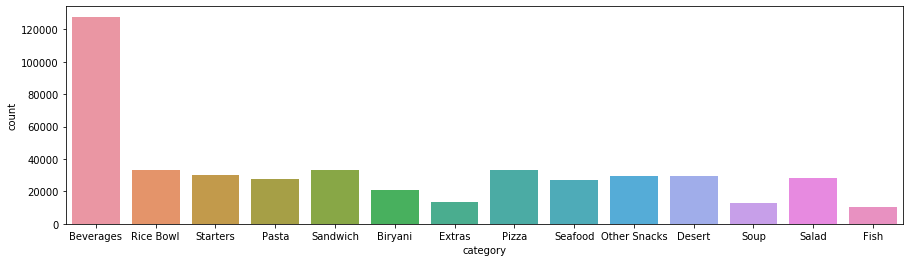

In [21]:
plt.figure(figsize=(15,4)) #Enlarging the Graph
sns.countplot(train['category']) 

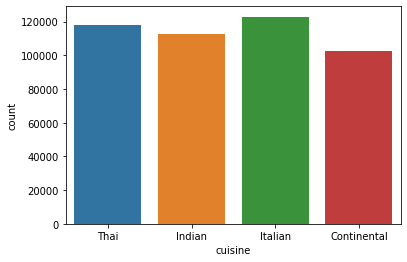

In [22]:
sns.countplot(train['cuisine'])

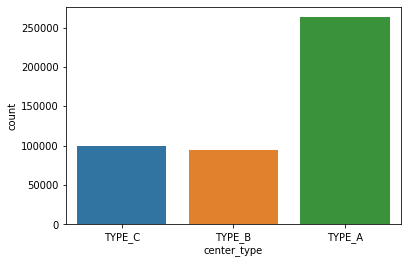

In [23]:
sns.countplot(train['center_type'])

In [24]:
def process_catagorical_vars(data):
    cat_dummies = pd.get_dummies(data['category'] , drop_first=True)
    cuisine_dummies = pd.get_dummies(data['cuisine'] , drop_first=True)
    center_type_dummies = pd.get_dummies(data['center_type'] , drop_first=True)
    
    data.drop(['category','cuisine','center_type'], axis =1 , inplace =True)
    
    return pd.concat([ data ,cat_dummies , cuisine_dummies ,center_type_dummies] , axis = 1 )

In [25]:
train = process_catagorical_vars(train)
test = process_catagorical_vars(test)

In [26]:
train.columns , test.columns #Dummies Created successfully

(Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
        'region_code', 'op_area', 'Biryani', 'Desert', 'Extras', 'Fish',
        'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
        'Seafood', 'Soup', 'Starters', 'Indian', 'Italian', 'Thai', 'TYPE_B',
        'TYPE_C'],
       dtype='object'),
 Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured', 'city_code',
        'region_code', 'op_area', 'Biryani', 'Desert', 'Extras', 'Fish',
        'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
        'Seafood', 'Soup', 'Starters', 'Indian', 'Italian', 'Thai', 'TYPE_B',
        'TYPE_C'],
       dtype='object'))

## Dropping Irrelevant Features 

In [27]:
corr = train.corr()

In [28]:
corr

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,Salad,Sandwich,Seafood,Soup,Starters,Indian,Italian,Thai,TYPE_B,TYPE_C
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,...,0.053560,-0.010443,-0.008290,-0.000993,-0.014198,-0.014767,0.008295,-0.015930,0.009282,-0.004497
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,...,0.006638,0.007239,0.001415,-0.045336,0.000266,0.007037,0.014695,-0.029820,-0.091954,-0.061086
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,...,0.260413,0.080984,0.084958,-0.032146,0.159467,-0.156288,0.096024,0.125012,0.004090,-0.008088
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,...,-0.069729,-0.077476,0.455558,-0.120754,-0.093482,0.031917,-0.186959,-0.459606,0.021740,-0.026378
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,...,-0.086115,-0.085372,0.484380,-0.129056,-0.115450,0.033232,-0.202578,-0.478318,0.017395,-0.021952
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,...,-0.007739,0.049495,0.094457,-0.050220,-0.034307,-0.052190,0.011145,-0.117787,-0.005064,0.008600
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,...,-0.039199,0.004285,0.025724,-0.038733,-0.030740,-0.059371,-0.049736,0.040783,0.001877,-0.030601
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,...,0.079172,0.189771,-0.101768,-0.076762,-0.071327,-0.047453,0.149443,0.021724,0.073322,-0.073647
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,...,-0.003912,-0.003723,0.002864,0.038829,-0.004885,-0.008286,-0.009568,0.020253,0.004382,0.088261
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,...,-0.002485,-0.003063,-0.000111,0.033747,-0.003075,-0.004475,-0.007721,0.021114,-0.055865,0.017814


In [29]:
def dropping_col(data,col_to_drop):
    data.drop(col_to_drop,inplace = True, axis = 1 )
    
dropping_col(train,'base_price')  #this feature does not seem relevant conidering the presence of 'checkout price' , hence i have dropped this
dropping_col(test,'base_price')

## Creating Clusters (KMeans Labels)

In [30]:
from sklearn.cluster import KMeans 

def create_clusters(data):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(data)
    return kmeans.labels_

train['labels']=create_clusters(train)
test['labels']=create_clusters(test)


## We will divide our train data set further into two more parts i.e train set and validation set.
(A validation set is the set on which we test our model , after successful ttraining and analysis on train set.)


In [31]:
def train_val_split(data):
    train,val= train_test_split(data,test_size =0.2, random_state=112)
    return train,val

train,val = train_val_split(train)

In [32]:
def x_y_split(data,target_var):                     
    x = data.drop(target_var , axis = 1 )
    y = data[target_var]
    return x , y

x_train , y_train = x_y_split(train,'num_orders')
x_val , y_val = x_y_split(val,'num_orders')

In [33]:
x_train.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,Biryani,...,Sandwich,Seafood,Soup,Starters,Indian,Italian,Thai,TYPE_B,TYPE_C,labels
id,,,,,,,,,,,,,,,,,,,,,
1111132,145,145,2126,437.53,0,0,620,77,3.9,0,...,0,0,0,0,0,1,0,0,0,3
1272384,64,53,2707,193.06,0,0,590,56,3.8,0,...,0,0,0,0,0,1,0,0,0,0
1127287,75,101,2290,309.49,0,0,699,85,2.8,0,...,0,0,0,0,1,0,0,0,1,0
1283482,46,26,2826,242.50,1,0,515,77,3.0,0,...,1,0,0,0,0,1,0,0,1,0
1261045,136,67,2704,321.13,0,0,638,56,7.0,0,...,0,0,0,0,0,0,1,1,0,0


In [34]:
x_val.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,Biryani,...,Sandwich,Seafood,Soup,Starters,Indian,Italian,Thai,TYPE_B,TYPE_C,labels
id,,,,,,,,,,,,,,,,,,,,,
1262137,85,101,1062,184.36,0,0,699,85,2.8,0,...,0,0,0,0,0,1,0,0,1,1
1124272,40,43,2304,484.03,0,0,590,56,5.1,0,...,0,0,0,0,1,0,0,0,0,0
1393517,12,124,1558,534.53,1,1,590,56,4.0,0,...,0,0,0,0,0,0,0,0,1,1
1265400,40,29,2490,242.50,0,0,526,34,4.0,0,...,0,0,0,0,0,1,0,0,1,0
1378662,68,76,1558,678.03,0,0,614,85,3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
from sklearn.preprocessing import StandardScaler
def scale(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaler.transform(data)
scale(x_train)
scale(test)

## Visualising Data for more Insights

In [36]:
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

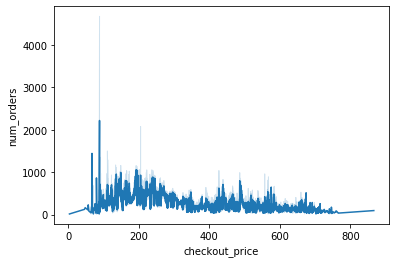

In [37]:
sns.lineplot(train['checkout_price'],train['num_orders'])  #checkout price is highly correlated with num_orders 

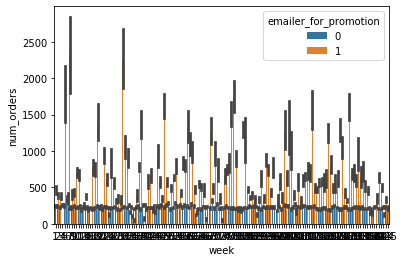

In [39]:
sns.barplot(train['week'], train['num_orders'],train['emailer_for_promotion']) #this plot shows that the no. of orders were significntly higger when an email was sent for promotion

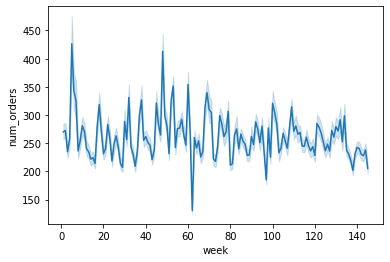

In [40]:
sns.lineplot(train['week'],train['num_orders']) #we can see that we had highest no. of orders in around 10th week and lowest around 62th week


## Creating ML Model and Testing Accuracy

#### For our Evaluation Metrics , it is advised in our problem statment to use RMSLE 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [42]:
from sklearn.ensemble import RandomForestRegressor 
reg = RandomForestRegressor(n_estimators = 20, random_state = 0) 
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [43]:
pred = reg.predict(x_train)

In [44]:
sqrt(mean_squared_log_error( y_train, pred ))

0.22618130426897426

(<matplotlib.axes._subplots.AxesSubplot at 0x2189bfbb508>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2189bfbb508>)

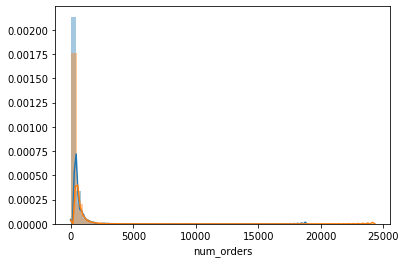

In [49]:
 sns.distplot(pred) , sns.distplot(train['num_orders']) #BLUE : Predicted values , ORANGE: Original Values

In [45]:
pred_test = reg.predict(test)
diction={'Id':test.index,'num_orders':pred_test}
df3=pd.DataFrame(diction)
df3.to_csv('Submission.csv',index=False)

In [46]:
df3

,Id,num_orders
0,1028232,876.70
1,1127204,822.55
2,1212707,167.40
3,1082698,52.55
4,1400926,59.40
...,...,...
32568,1250239,1102.20
32569,1039516,32.10
32570,1158107,2227.75
32571,1444235,426.40


In [50]:
from pmdarima import auto_arima 

ModuleNotFoundError: No module named 'pmdarima'